In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
import requests
from io import StringIO

In [4]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"
source = requests.get(url).text
poll_data = StringIO(source)

In [5]:
poll_df = pd.read_csv(poll_data)

In [6]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [7]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

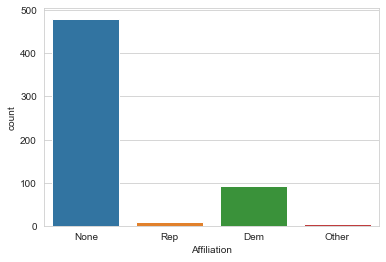

In [8]:
#Party affiliations among people polled
sns.countplot('Affiliation',data=poll_df)

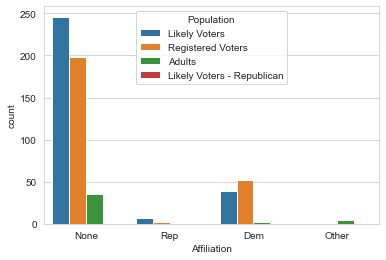

In [9]:
#Population descriptions based on party affiliation
sns.countplot('Affiliation',data=poll_df,hue='Population')

In [10]:
#Average voter percentage per candidates among all pollers
avg = DataFrame(poll_df.mean())
avg.drop(['Number of Observations','Question Text','Question Iteration','Other'],axis=0,inplace=True)

#Standard deviation of percentages per candidates among all pollers
std = DataFrame(poll_df.std())
std.drop(['Number of Observations','Question Text','Question Iteration','Other'],axis=0,inplace=True)

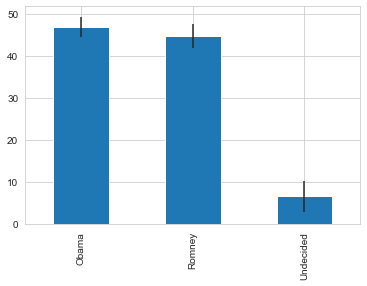

In [11]:
#Average (including variance) voter percentage
avg.plot(yerr=std,kind='bar',legend=False)

In [12]:
#Representation of this data in tabular form
poll_avg = pd.concat([avg,std],axis=1)
poll_avg.columns = ['Average','Standard Deviation']
poll_avg

,Average,Standard Deviation
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


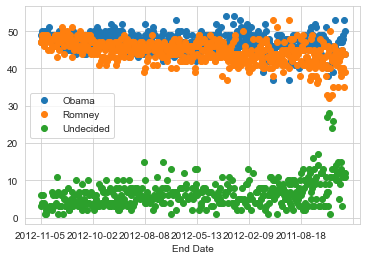

In [16]:
#voter sentiment over time

poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle='',marker='o')

In [17]:
from datetime import datetime

In [21]:
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100
poll_df.Difference.head()

0    0.00
1    0.02
2    0.00
3    0.01
4   -0.01
Name: Difference, dtype: float64

In [23]:
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


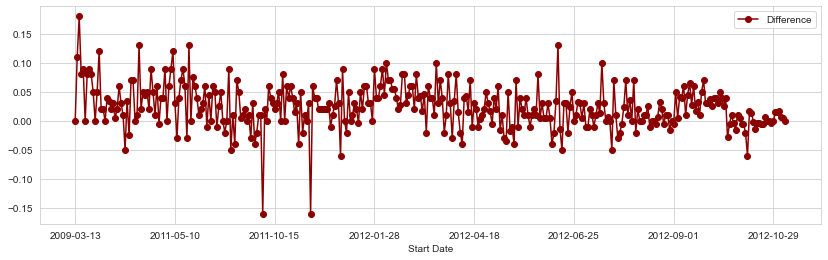

In [37]:
poll_df.plot('Start Date','Difference',figsize=(14,4),marker='o',linestyle='-',color='darkred')

In [47]:
#finding all data in in October 2012, when the debates occurred
row_in = 0
xlimit = []
for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1

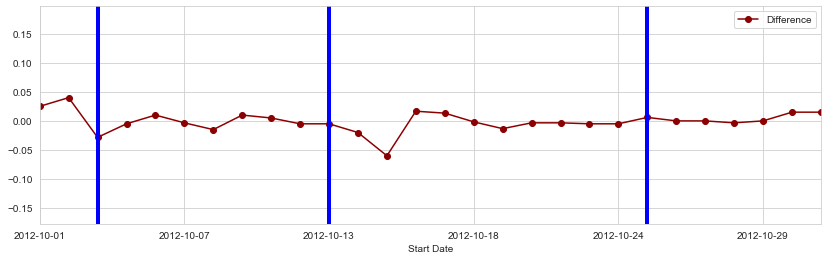

In [49]:
poll_df.plot('Start Date','Difference',figsize=(14,4),marker='o',linestyle='-',color='darkred',
             xlim=(min(xlimit),max(xlimit)))

#adding line markers when the debates happened, to see if voter sentiment changed afterwards
#10/3
plt.axvline(x=min(xlimit)+2,linewidth=4,color='blue')
#10/11
plt.axvline(x=min(xlimit)+10,linewidth=4,color='blue')
#10/22
plt.axvline(x=min(xlimit)+21,linewidth=4,color='blue')

In [50]:
#Now let's look at some donor data
donor_df = pd.read_csv('Election_Donor_Data.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [51]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [54]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [55]:
#Donation amount info
donor_df['contb_receipt_amt'].value_counts()

100.00    178188
50.00     137584
25.00     110345
250.00     91182
500.00     57984
           ...  
97.15          1
122.32         1
188.65         1
122.40         1
132.12         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

In [58]:
donation_mean = donor_df['contb_receipt_amt'].mean()
donation_std = donor_df['contb_receipt_amt'].std()
print(donation_mean)
print(donation_std)

298.2351500951093
3749.666723269043


In [70]:
#The standard deviation is abnormally large, so we can analyze the actual values
top_donor = donor_df['contb_receipt_amt'].copy()
top_donor.sort_values(inplace=True)
top_donor

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 1001731, dtype: float64

In [71]:
#We can then see that there are negative values that greatly affect the data, so we can remove those
top_donor = top_donor[top_donor>0]
top_donor.sort_values()

334504          0.01
321779          0.01
323547          0.01
325614          0.01
326100          0.01
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 991475, dtype: float64

In [72]:
top_donor.value_counts().head()

100.0    178188
50.0     137584
25.0     110345
250.0     91182
500.0     57984
Name: contb_receipt_amt, dtype: int64

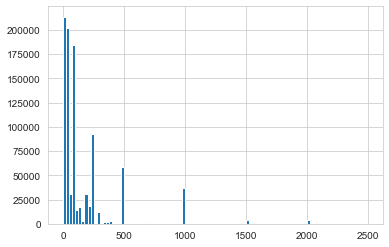

In [75]:
#Let's check if rounded number donations are more common than other more unique donation amounts
common_don = top_donor[top_donor<2500]
common_don.hist(bins=100)

In [76]:
#Adding a party affiliation column
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [77]:
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [78]:
donor_df = donor_df[donor_df.contb_receipt_amt>0]
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [80]:
#Looking at how many donations each candidate received
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [92]:
#Total amount of donations per candidate, rounded to nearest dollar
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()
round(cand_amount)

cand_nm
Bachmann, Michelle                  2711439.0
Cain, Herman                        7101082.0
Gingrich, Newt                     12832770.0
Huntsman, Jon                       3330373.0
Johnson, Gary Earl                   566962.0
McCotter, Thaddeus G                  39030.0
Obama, Barack                     135877427.0
Paul, Ron                          21009620.0
Pawlenty, Timothy                   6004819.0
Perry, Rick                        20305754.0
Roemer, Charles E. 'Buddy' III       373010.0
Romney, Mitt                       88335908.0
Santorum, Rick                     11043159.0
Name: contb_receipt_amt, dtype: float64

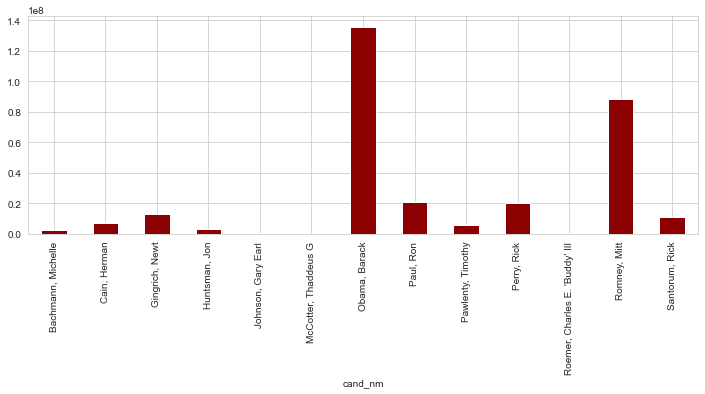

In [103]:
cand_amount.plot(kind='bar',figsize=(12,4),color='darkred')

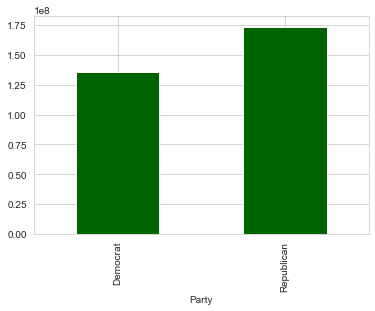

In [107]:
#Donation amounts by party
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar',color='darkgreen')

In [111]:
#Let's dive deeper into the donors
occupation_df = donor_df.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='Party',aggfunc='sum')
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [112]:
occupation_df.shape

(45067, 2)

In [113]:
#We have a lot of data, so let's narrow down our data to include only occupations that have donated a very large sum
occupation_df = occupation_df[occupation_df.sum(1)>1000000]
occupation_df.shape

(31, 2)

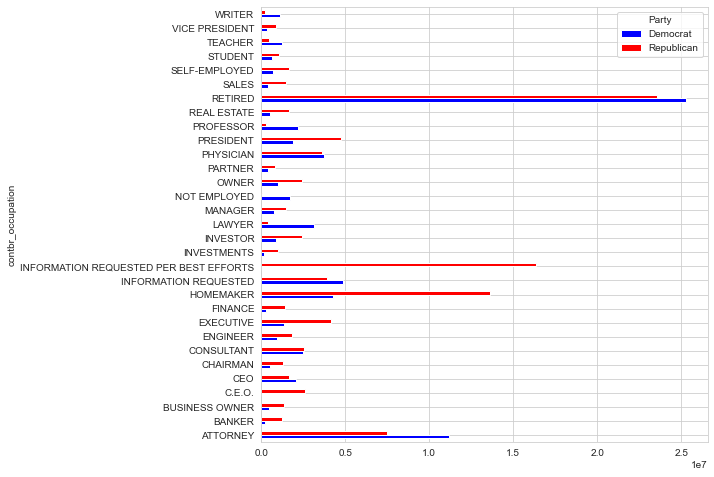

In [123]:
occupation_df.plot(kind='barh',figsize=(8,8),color=['blue','red'])

In [125]:
#Combine CEO and C.E.O. columns
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']

#Drop unneccessary columns
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED','C.E.O.'],axis=0,inplace=True)

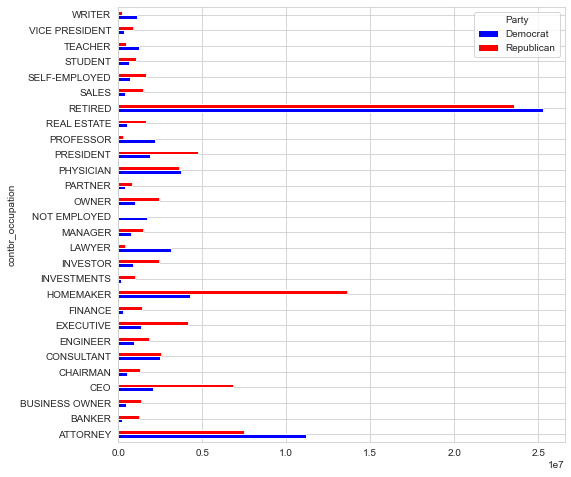

In [126]:
occupation_df.plot(kind='barh',figsize=(8,8),color=['blue','red'])